<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/apriori_like_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori

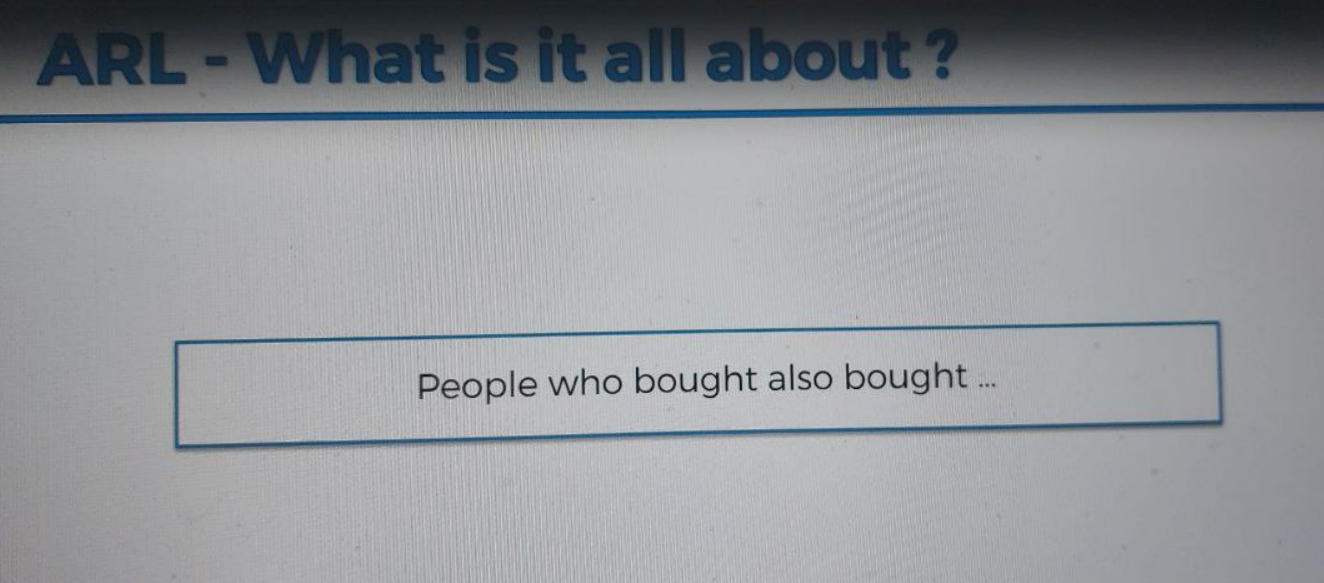

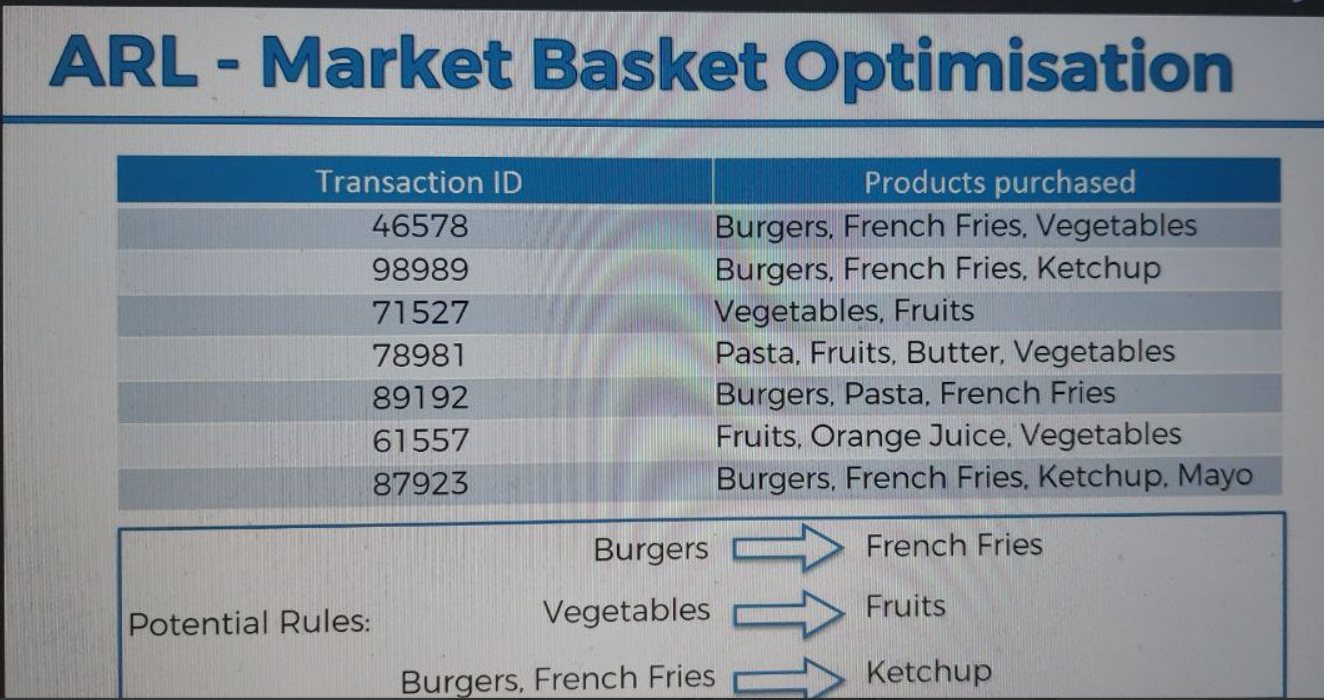

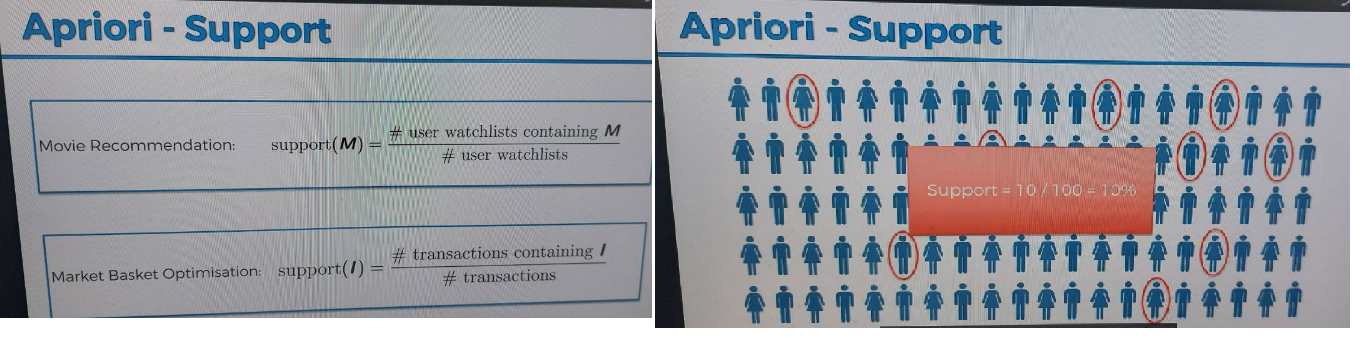

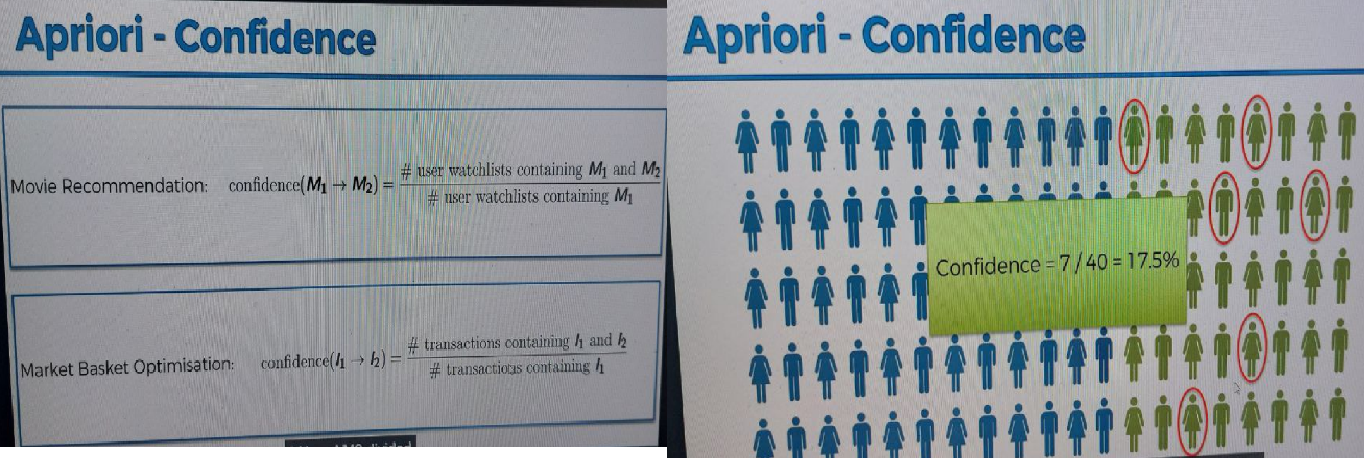

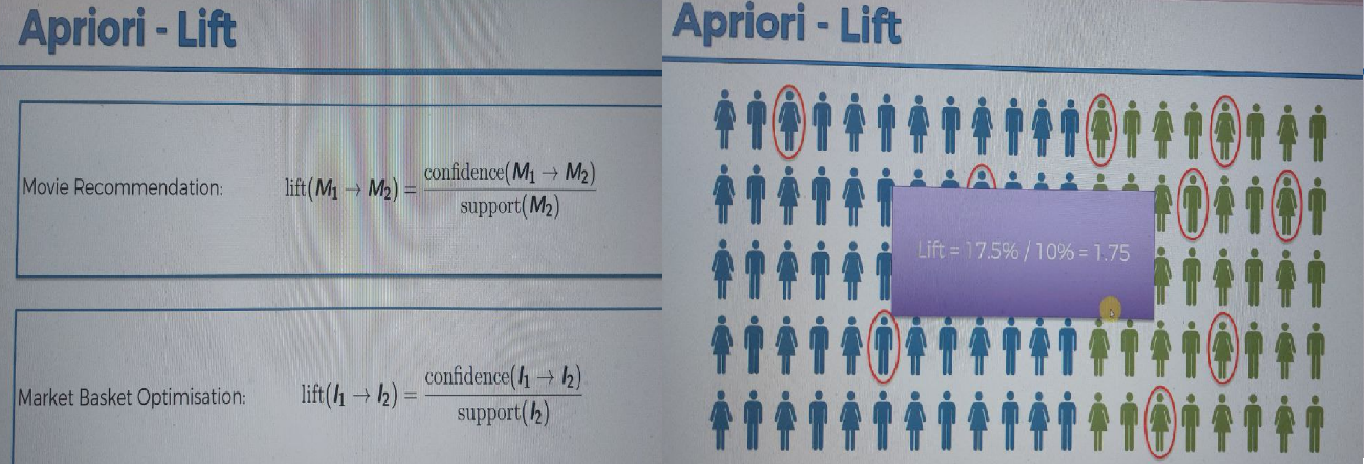

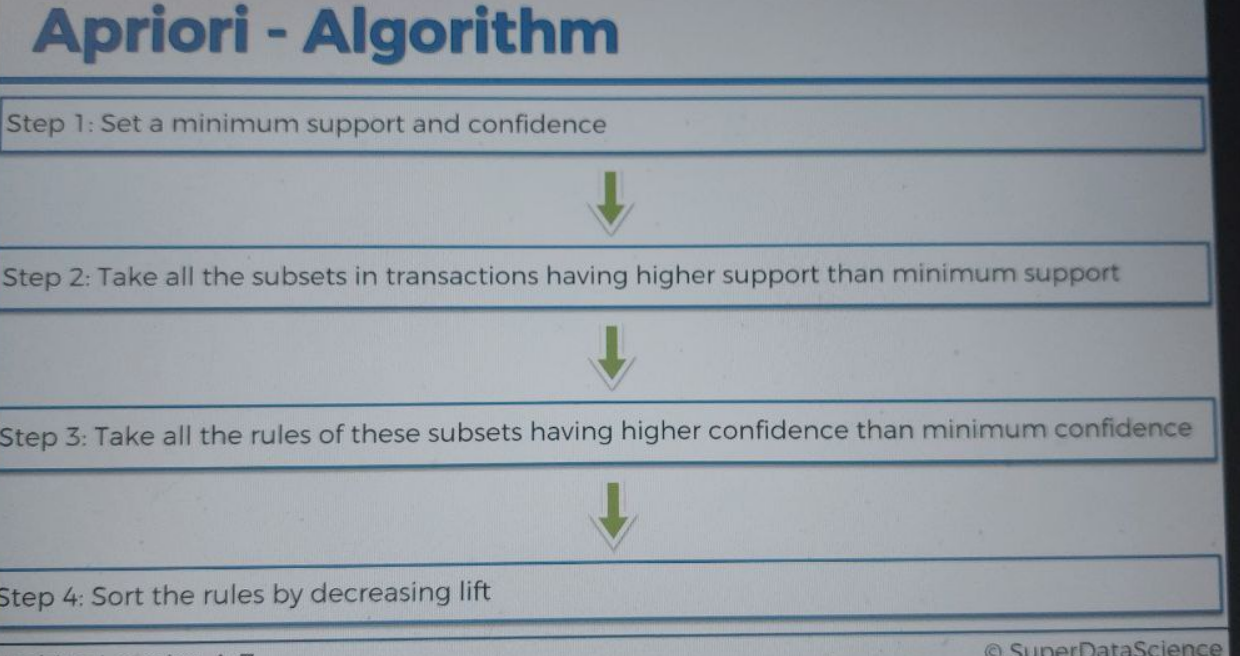

## Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install apyori # library for Apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=b643f1ec02c9b62e69d2966c5b99919cada95cbaea02bd61bdea04796b5e06d7
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [ ]:
 #header is None ,because to do Aprior we dont have any header for column
dataset=pd.read_csv("/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part5-AssociationRuleLearning/Section28-Apriori/Market_Basket_Optimisation.csv",header=None)
transactions=[]
for i in range(0,7501): # number of rows,
  transactions.append([str(dataset.values[i,j]) for j in range(0,20)]) # second for loop to move into the columns- 20 is maximum number of columns


## Training the Apriori model on the dataset



```
to run Aprior we should have the below options:

-min_support:
means" the product in the rules apear at least 0.3%"
we have (at least) 3 transactions per day * 7 transactions per weeks / devided by number of total transactions for all people in that store is 7501
(3*7)/7501=0.0027 =0.003

-min_confidence=>
means ,"each product a in the left hand side of the rule well we have a product b in the riht hand side of the rule at least 20% of the time."
for this , there is a rule that min_confid is =0.8 means 80% of people  wants that product, but 80% is much so we can use devide by 2 that is 0.4 and 40 % is also high. and again we devide by 2 and it become 0.2 it means 20%

- min_lift=> is a relevant that is consist of 3,4,..,9 but its good to we choos 3

-min_lenght=> minimum number of element that we want to have in the rule . its for "if customer buying one  product a and get one product B for free"

max_lenght=> same az min but is maximum numberof element


```



In [ ]:
from apyori  import apriori
rules=apriori(transactions=transactions,min_support=0.003,min_confidance=0.2,min_lift=3,min_lenght=2,max_lenght=2)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function



```
items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232   => means:
if pearson buy brownies , likly buy cottage chees in 0.10 %
```



In [ ]:
results=list(rules)
results

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

### Putting the results well organised into a Pandas DataFrame

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results] #rightt hand of the rule -[2] is seprated by "," and into "[]" is one element
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [ ]:
resultsinDataFrame

Left Hand Side       Right Hand Side   Support  Confidence      Lift
0         brownies        cottage cheese  0.003466    0.102767  3.225330
1          chicken           light cream  0.004533    0.075556  4.843951
2         escalope  mushroom cream sauce  0.005733    0.072269  3.790833
3         escalope                 pasta  0.005866    0.073950  4.700812
4      fresh bread          tomato juice  0.004266    0.099071  3.259356
..             ...                   ...       ...         ...       ...
183    ground beef             spaghetti  0.003066    0.211009  3.532991
184    ground beef             spaghetti  0.003066    0.031208  3.344117
185      olive oil                  milk  0.003333    0.050607  3.216994
186           milk             spaghetti  0.003066    0.063889  3.014029
187       tomatoes                  milk  0.003333    0.048733  3.097846

[188 rows x 5 columns]

### Displaying the results sorted by descending lifts

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift') # return 10 number of rows that amount of Lift is largest than others

Left Hand Side    Right Hand Side   Support  Confidence      Lift
68       olive oil  whole wheat pasta  0.003866    0.058704  6.115863
152      olive oil                nan  0.003866    0.058704  6.115863
35   fromage blanc              honey  0.003333    0.245098  5.178818
6    fromage blanc              honey  0.003333    0.245098  5.164271
58     ground beef          spaghetti  0.003066    0.031208  4.980600
140    ground beef                nan  0.003066    0.031208  4.980600
1          chicken        light cream  0.004533    0.075556  4.843951
20         chicken                nan  0.004533    0.075556  4.843951
3         escalope              pasta  0.005866    0.073950  4.700812
31        escalope                nan  0.005866    0.073950  4.700812